<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#3.-Testing" data-toc-modified-id="3.-Testing-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>3. Testing</a></span><ul class="toc-item"><li><span><a href="#3-1.-Data&amp;Model-selection" data-toc-modified-id="3-1.-Data&amp;Model-selection-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>3-1. Data&amp;Model selection</a></span></li><li><span><a href="#3-2.-Testing" data-toc-modified-id="3-2.-Testing-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>3-2. Testing</a></span></li><li><span><a href="#3-3.-Save-Result" data-toc-modified-id="3-3.-Save-Result-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>3-3. Save Result</a></span></li></ul></li></ul></div>

In [1]:
import sys, os
import pandas as pd
import numpy as np
import setting
import pathSetting
sys.path.append("../../..")

from KETIToolDL.CLUSTTool.common import p1_integratedDataSaving as p1
from KETIToolDL.CLUSTTool.common import p2_dataSelection as p2
from KETIToolDL.CLUSTTool.common import p3_training as p3
from KETIToolDL.CLUSTTool.common import p4_testing as p4
from KETIToolDL.CLUSTTool.Classification import p4_testing as p4C

import torch

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"{device}" " is available.")

cpu is available.


# 3. Testing
## 3-1. Data&Model selection

In [2]:
# Test Data & Model
# 1-1. 저장 Data 확인
DataMeta = p1.readJsonData(pathSetting.DataMetaPath)
dataList =  list(DataMeta.keys())
dataList

['testy_ActionPatternData_SplitNone',
 'trainy_ActionPatternData_SplitNone',
 'trainX_ActionPatternData_Split3',
 'testX_ActionPatternData_Split3',
 'trainX_ActionPatternData_Split1',
 'testX_ActionPatternData_Split1',
 'ML_trainX_ActionPatternData_Split3',
 'ML_trainy_ActionPatternData_Split3',
 'ML_testX_ActionPatternData_Split3',
 'ML_testy_ActionPatternData_Split3']

In [3]:
dataList[8] , dataList[9]

('ML_testX_ActionPatternData_Split3', 'ML_testy_ActionPatternData_Split3')

In [4]:
# 1-2. Select Test Data
## dataX
dataName_X = dataList[8]
## datay
dataName_y = dataList[9]
dataFolderName = "data_integrated_result"

# 1-3. 저장 Model 확인
ModelMeta =p1.readJsonData(pathSetting.trainModelMetaFilePath)
modelList = list(ModelMeta.keys())
modelList

['trainX_ActionPatternData_Split3_FC_cf',
 'trainX_ActionPatternData_Split1_FC_cf',
 'ML_trainX_ActionPatternData_Split3_FC_cf']

In [5]:
# 1-4. select Model 
modelName = modelList[2]
windows = DataMeta[dataName_X]["integrationInfo"]["dataInfo"]["windows"]

In [6]:
# 1-5. 선택한 Model 확인
modelName

'ML_trainX_ActionPatternData_Split3_FC_cf'

## 3-2. Testing

In [7]:
# 2. Testing
# 2-1. Read Parameter and model information and Testing
df_result, result_metrics, acc= p4C.getTestResult(dataName_X, dataName_y, modelName, DataMeta, ModelMeta, dataFolderName, device, windows)

(2947, 32)
                     concat_emb1  concat_emb2  concat_emb3  concat_emb4  \
2022-02-01 00:00:00     0.074119    -0.014260    -0.104811     0.046630   
2022-02-01 00:00:04     0.089038    -0.020096    -0.095663     0.039496   
2022-02-01 00:00:08     0.095532    -0.024518    -0.083150     0.044612   
2022-02-01 00:00:12     0.081709    -0.022433    -0.105032     0.046437   
2022-02-01 00:00:16     0.081172    -0.026887    -0.120805     0.048375   
...                          ...          ...          ...          ...   
2022-02-01 03:16:08    -0.174413     0.175975     0.157452     0.009674   
2022-02-01 03:16:12    -0.174086     0.175768     0.157320     0.009432   
2022-02-01 03:16:16    -0.174154     0.176241     0.157891     0.009649   
2022-02-01 03:16:20    -0.174316     0.176022     0.157512     0.009578   
2022-02-01 03:16:24    -0.174141     0.176133     0.157816     0.009507   

                     concat_emb5  concat_emb6  concat_emb7  concat_emb8  \
2022-02-01 00

/opt/homebrew/Caskroom/miniforge/base/envs/Clust/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/Caskroom/miniforge/base/envs/Clust/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/Caskroom/miniforge/base/envs/Clust/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

{3, 5}

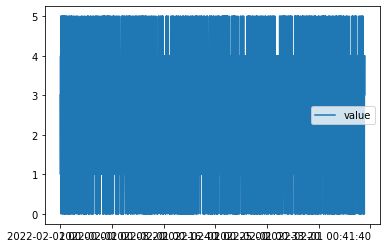

In [8]:
# 2-2. Result
df_result[['value']].plot()
set(df_result['prediction'].values)

In [9]:
# 2-3. result_metrics 확인
result_metrics

{'0': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 496},
 '1': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 471},
 '2': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 420},
 '3': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 491},
 '4': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 532},
 '5': {'precision': 0.2186482084690554,
  'recall': 1.0,
  'f1-score': 0.35883728700300704,
  'support': 537},
 'accuracy': 0.3488293179504581,
 'macro avg': {'precision': 0.20310803474484254,
  'recall': 0.3333333333333333,
  'f1-score': 0.22647288116716782,
  'support': 2947},
 'weighted avg': {'precision': 0.2064520149127529,
  'recall': 0.3488293179504581,
  'f1-score': 0.23199715748918043,
  'support': 2947}}

In [10]:
# 2-4. 정확도 확인
acc

0.3488293179504581

## 3-3. Save Result

In [15]:
# 3. Save Result
import json

with open('./modelResult/{}_result.json'.format(modelName),'w') as f:
  json.dump(result_metrics, f, ensure_ascii=False, indent=4)